In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from flaml import AutoML

In [206]:
df=pd.read_csv(r'C:\Users\marci\DataScience\Pitch_predictions\pitch-aileron\train1.csv').copy()
print(df.head())
print(df.shape)


   CbRt  SGZ     P     Q  CrRl  AbRl  DfClb  DfRlRt  DfDfClb     ST1     ST2  \
0  -437   10 -0.34  0.15  -0.4   -20      4  -0.017     -0.4 -0.0013 -0.0016   
1  -282  -34 -0.40  0.00   0.3   -10     -5  -0.020      1.6 -0.0010 -0.0010   
2   -90  -20 -0.21 -0.02   0.2    -8      3  -0.004     -0.2 -0.0005 -0.0006   
3  -164    0  0.19  0.08   2.0   -11    -12  -0.009      0.5 -0.0009 -0.0008   
4     8  -36  0.41  0.09   1.8   -19      9  -0.022     -0.1 -0.0021 -0.0022   

      ST3     ST4   DfST1  DfST2   DfST3  DfST4      Sa  Target  
0 -0.0016 -0.0016  0.0003      0  0.0000      0 -0.0016   0.022  
1 -0.0010 -0.0010  0.0000      0  0.0000      0 -0.0010   0.016  
2 -0.0006 -0.0006  0.0000      0  0.0000      0 -0.0006   0.019  
3 -0.0008 -0.0008 -0.0002      0 -0.0001      0 -0.0008   0.017  
4 -0.0022 -0.0024  0.0001      0  0.0001      0 -0.0024   0.036  
(4000, 19)


In [207]:
df.describe()

,CbRt,SGZ,P,Q,CrRl,AbRl,DfClb,DfRlRt,DfDfClb,ST1,ST2,ST3,ST4,DfST1,DfST2,DfST3,DfST4,Sa,Target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.0,4000.000000,4000.000000
mean,-10.608750,-12.620750,-0.016932,0.054312,0.037925,-10.758250,-0.505000,-0.000963,-0.04925,-0.000745,-0.000749,-0.000749,-0.000752,-0.000009,0.0,-0.000003,0.0,-0.000752,0.021514
std,274.021298,25.459605,0.311146,0.114691,0.965820,4.049618,10.664845,0.012638,0.91488,0.000394,0.000401,0.000401,0.000405,0.000085,0.0,0.000058,0.0,0.000405,0.006713
min,-840.000000,-94.000000,-1.370000,-0.380000,-3.000000,-23.000000,-47.000000,-0.055000,-6.60000,-0.003100,-0.003100,-0.003100,-0.003100,-0.000500,0.0,-0.000500,0.0,-0.003100,0.012000
25%,-196.000000,-29.000000,-0.240000,-0.030000,-0.700000,-13.000000,-8.000000,-0.009000,-0.20000,-0.000900,-0.000900,-0.000900,-0.001000,0.000000,0.0,0.000000,0.0,-0.001000,0.018000
50%,-26.000000,-13.000000,-0.020000,0.050000,0.100000,-10.000000,0.000000,-0.001000,-0.10000,-0.000650,-0.000600,-0.000600,-0.000700,0.000000,0.0,0.000000,0.0,-0.000700,0.019000
75%,171.000000,3.000000,0.210000,0.130000,0.700000,-7.000000,7.000000,0.007000,0.10000,-0.000500,-0.000500,-0.000500,-0.000500,0.000000,0.0,0.000000,0.0,-0.000500,0.022000
max,940.000000,93.000000,0.860000,0.550000,2.800000,-3.000000,45.000000,0.056000,6.10000,-0.000100,-0.000100,-0.000100,-0.000100,0.000700,0.0,0.000500,0.0,-0.000100,0.078000


<AxesSubplot:>

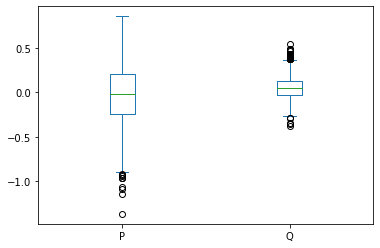

In [208]:
df.plot.box(column=['P','Q'])

In [209]:
df_T= df.drop('Target', axis=1)

In [210]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df_T),columns = df_T.columns)

In [211]:
df_scaled

,CbRt,SGZ,P,Q,CrRl,AbRl,DfClb,DfRlRt,DfDfClb,ST1,ST2,ST3,ST4,DfST1,DfST2,DfST3,DfST4,Sa
0,-1.556246,0.888607,-1.038445,0.834413,-0.453480,-2.282414,0.422469,-1.269137,-0.383432,-1.409247,-2.122261,-2.122261,-2.096492,3.629565,0.0,0.054091,0.0,-2.096492
1,-0.990526,-0.839837,-1.231305,-0.473615,0.271384,0.187263,-0.421531,-1.506544,1.802921,-0.647938,-0.625691,-0.625691,-0.613344,0.103719,0.0,0.054091,0.0,-0.613344
2,-0.289763,-0.289878,-0.620582,-0.648019,0.167832,0.681199,0.328691,-0.240374,-0.164796,0.620911,0.372022,0.372022,0.375422,0.103719,0.0,0.054091,0.0,0.375422
3,-0.559849,0.495779,0.665149,0.224000,2.031767,-0.059704,-1.077975,-0.636052,0.600427,-0.394168,-0.126834,-0.126834,-0.118961,-2.246846,0.0,-1.676818,0.0,-0.118961
4,0.067918,-0.918403,1.372302,0.311202,1.824663,-2.035446,0.891357,-1.664815,-0.055479,-3.439406,-3.618831,-3.618831,-4.074024,1.279001,0.0,1.784999,0.0,-4.074024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.038814,1.085021,1.500875,2.229644,-2.835175,-1.047575,0.141135,2.371100,-7.161126,1.128451,1.120307,1.120307,1.116996,0.103719,0.0,0.054091,0.0,1.116996
3996,-0.943078,-0.604140,-0.395579,-0.996827,-0.349928,1.175134,0.985135,-0.794324,-1.148655,0.620911,0.621451,0.621451,0.375422,0.103719,0.0,0.054091,0.0,0.375422
3997,0.286907,2.184940,0.536576,-0.212010,1.617559,1.669070,-0.327753,-0.636052,0.272474,0.874681,0.870879,0.870879,0.869805,0.103719,0.0,0.054091,0.0,0.869805
3998,0.925623,1.045738,2.593747,2.055240,-1.385447,-1.294543,-2.297086,1.104931,-0.164796,-0.140398,0.372022,0.372022,0.375422,-2.246846,0.0,0.054091,0.0,0.375422


<AxesSubplot:>

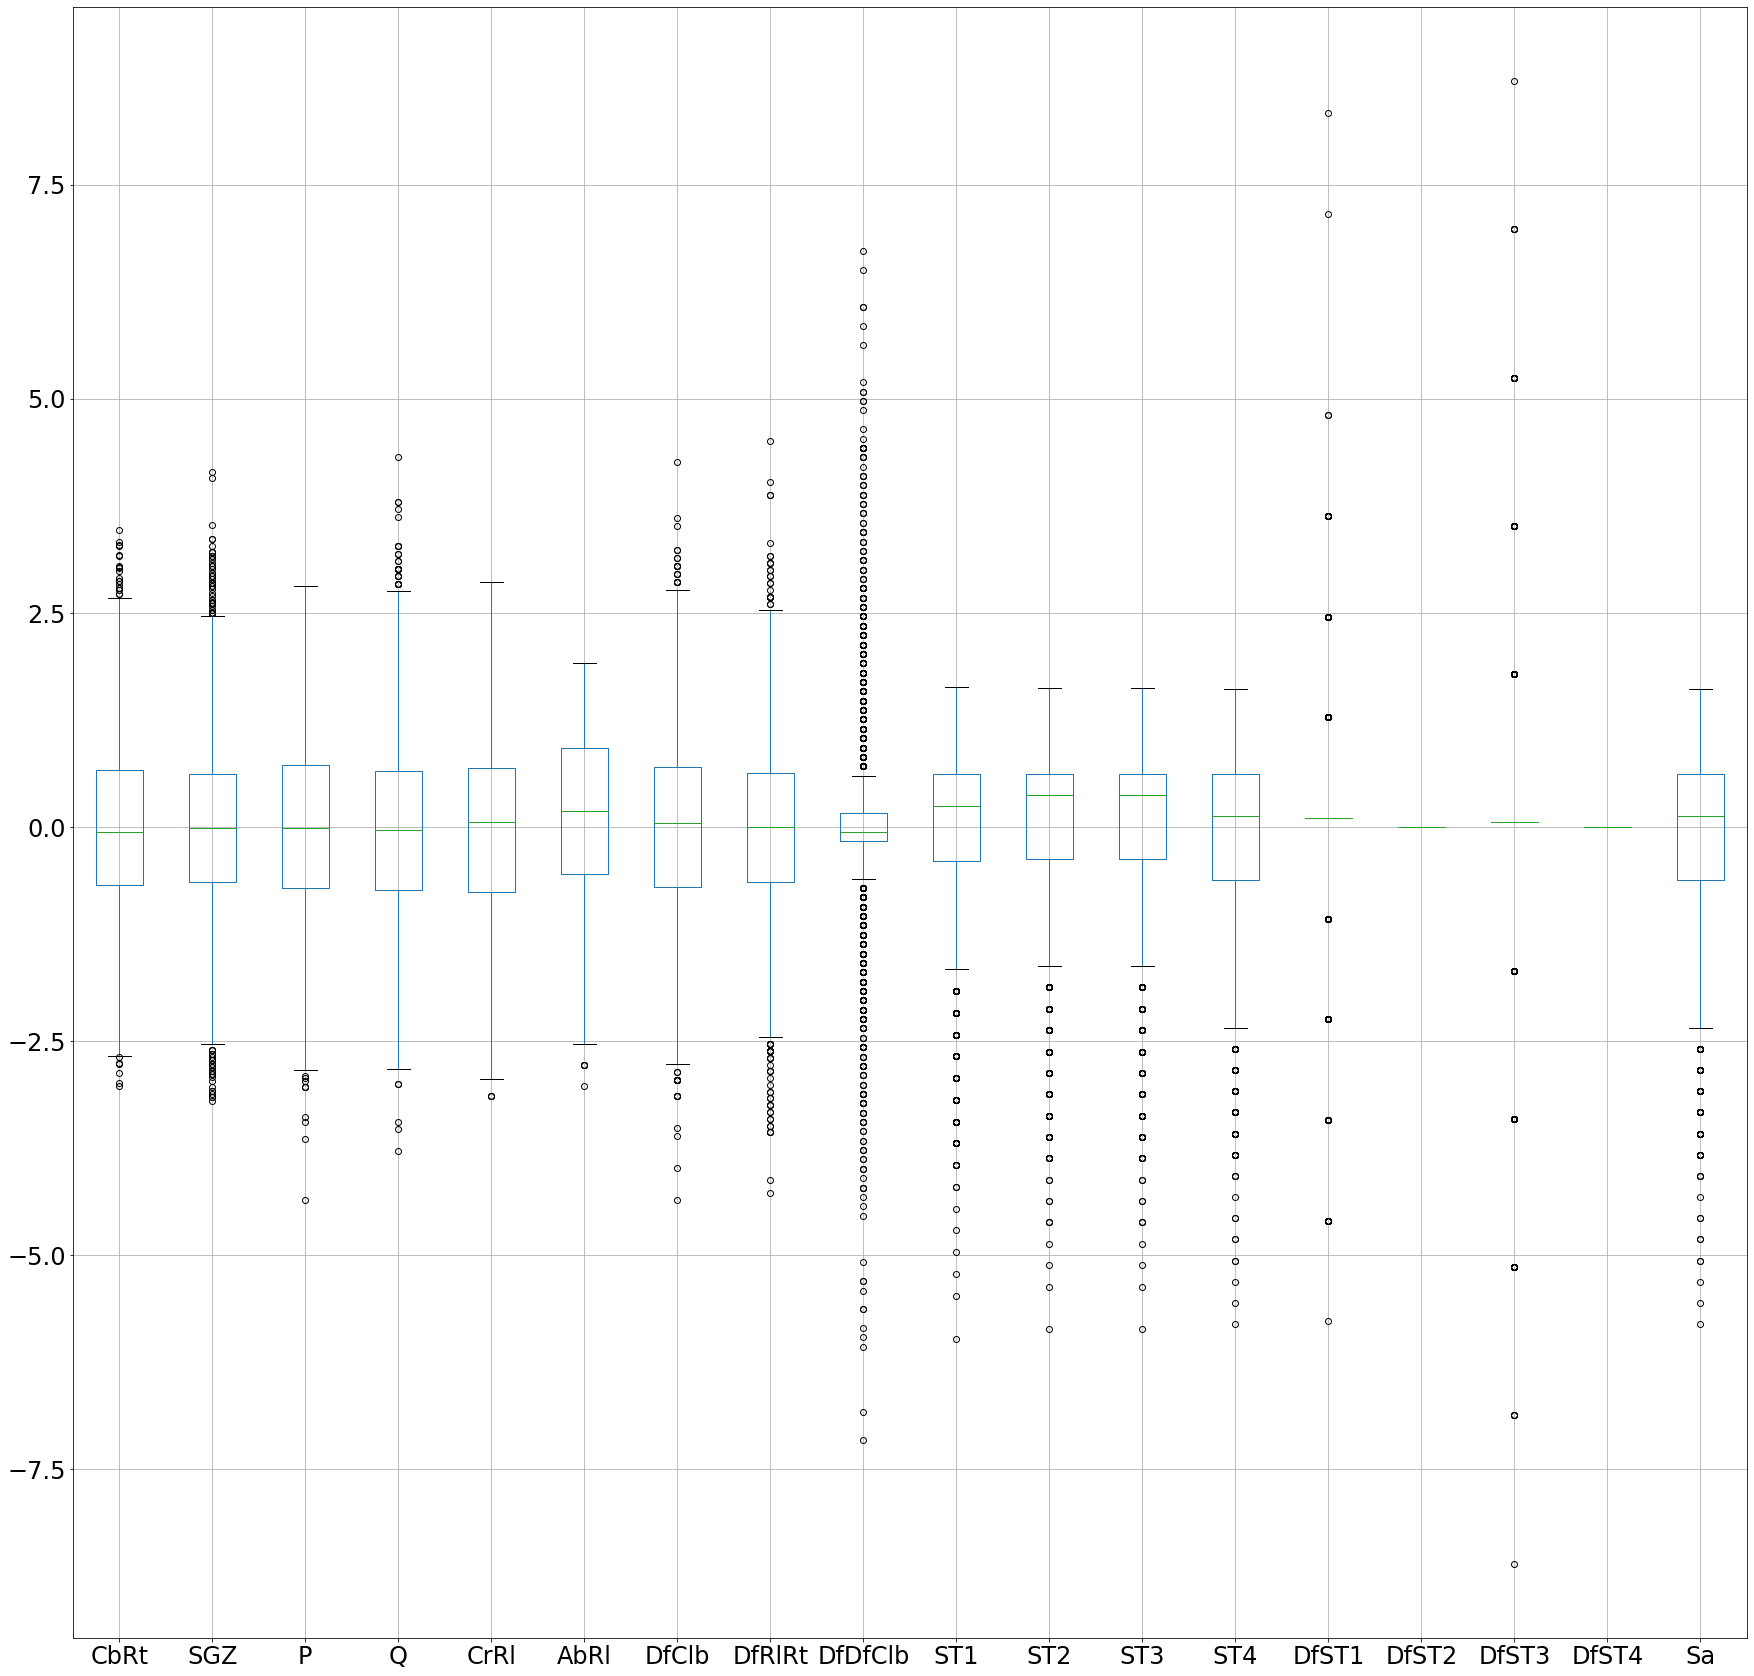

In [212]:
df_scaled.boxplot(figsize=(30,30), fontsize=24)

In [213]:
a=df_scaled1 = df_scaled['DfDfClb'].idxmin()


In [214]:
df_scaled.describe()

,CbRt,SGZ,P,Q,CrRl,AbRl,DfClb,DfRlRt,DfDfClb,ST1,ST2,ST3,ST4,DfST1,DfST2,DfST3,DfST4,Sa
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4000.0,4.000000e+03,4000.0,4.000000e+03
mean,-2.131628e-17,3.552714e-18,7.993606e-18,1.509903e-17,4.884981e-18,9.059420e-17,-1.332268e-18,8.881784e-19,-1.421085e-17,-2.842171e-17,-9.503509e-17,-9.503509e-17,-1.394440e-16,3.019807e-17,0.0,-4.618528e-17,0.0,-1.394440e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,0.0,1.000125e+00,0.0,1.000125e+00
min,-3.027119e+00,-3.196806e+00,-4.349204e+00,-3.787287e+00,-3.145831e+00,-3.023317e+00,-4.360196e+00,-4.276290e+00,-7.161126e+00,-5.977104e+00,-5.863685e+00,-5.863685e+00,-5.804364e+00,-5.772692e+00,0.0,-8.600452e+00,0.0,-5.804364e+00
25%,-6.766424e-01,-6.434231e-01,-7.170123e-01,-7.352210e-01,-7.641358e-01,-5.536399e-01,-7.028642e-01,-6.360524e-01,-1.647964e-01,-3.941679e-01,-3.762626e-01,-3.762626e-01,-6.133437e-01,1.037186e-01,0.0,5.409089e-02,0.0,-6.133437e-01
50%,-5.617510e-02,-1.489801e-02,-9.859954e-03,-3.760582e-02,6.427988e-02,1.872633e-01,4.735776e-02,-2.967585e-03,-5.547871e-02,2.402566e-01,3.720223e-01,3.720223e-01,1.282305e-01,1.037186e-01,0.0,5.409089e-02,0.0,1.282305e-01
75%,6.628370e-01,6.136271e-01,7.294357e-01,6.600094e-01,6.855916e-01,9.281665e-01,7.038019e-01,6.301172e-01,1.631566e-01,6.209113e-01,6.214506e-01,6.214506e-01,6.226134e-01,1.037186e-01,0.0,5.409089e-02,0.0,6.226134e-01
max,3.469539e+00,4.149081e+00,2.818750e+00,4.322489e+00,2.860183e+00,1.916037e+00,4.267356e+00,4.507762e+00,6.722216e+00,1.635990e+00,1.619164e+00,1.619164e+00,1.611379e+00,8.330694e+00,0.0,8.708633e+00,0.0,1.611379e+00


<AxesSubplot:>

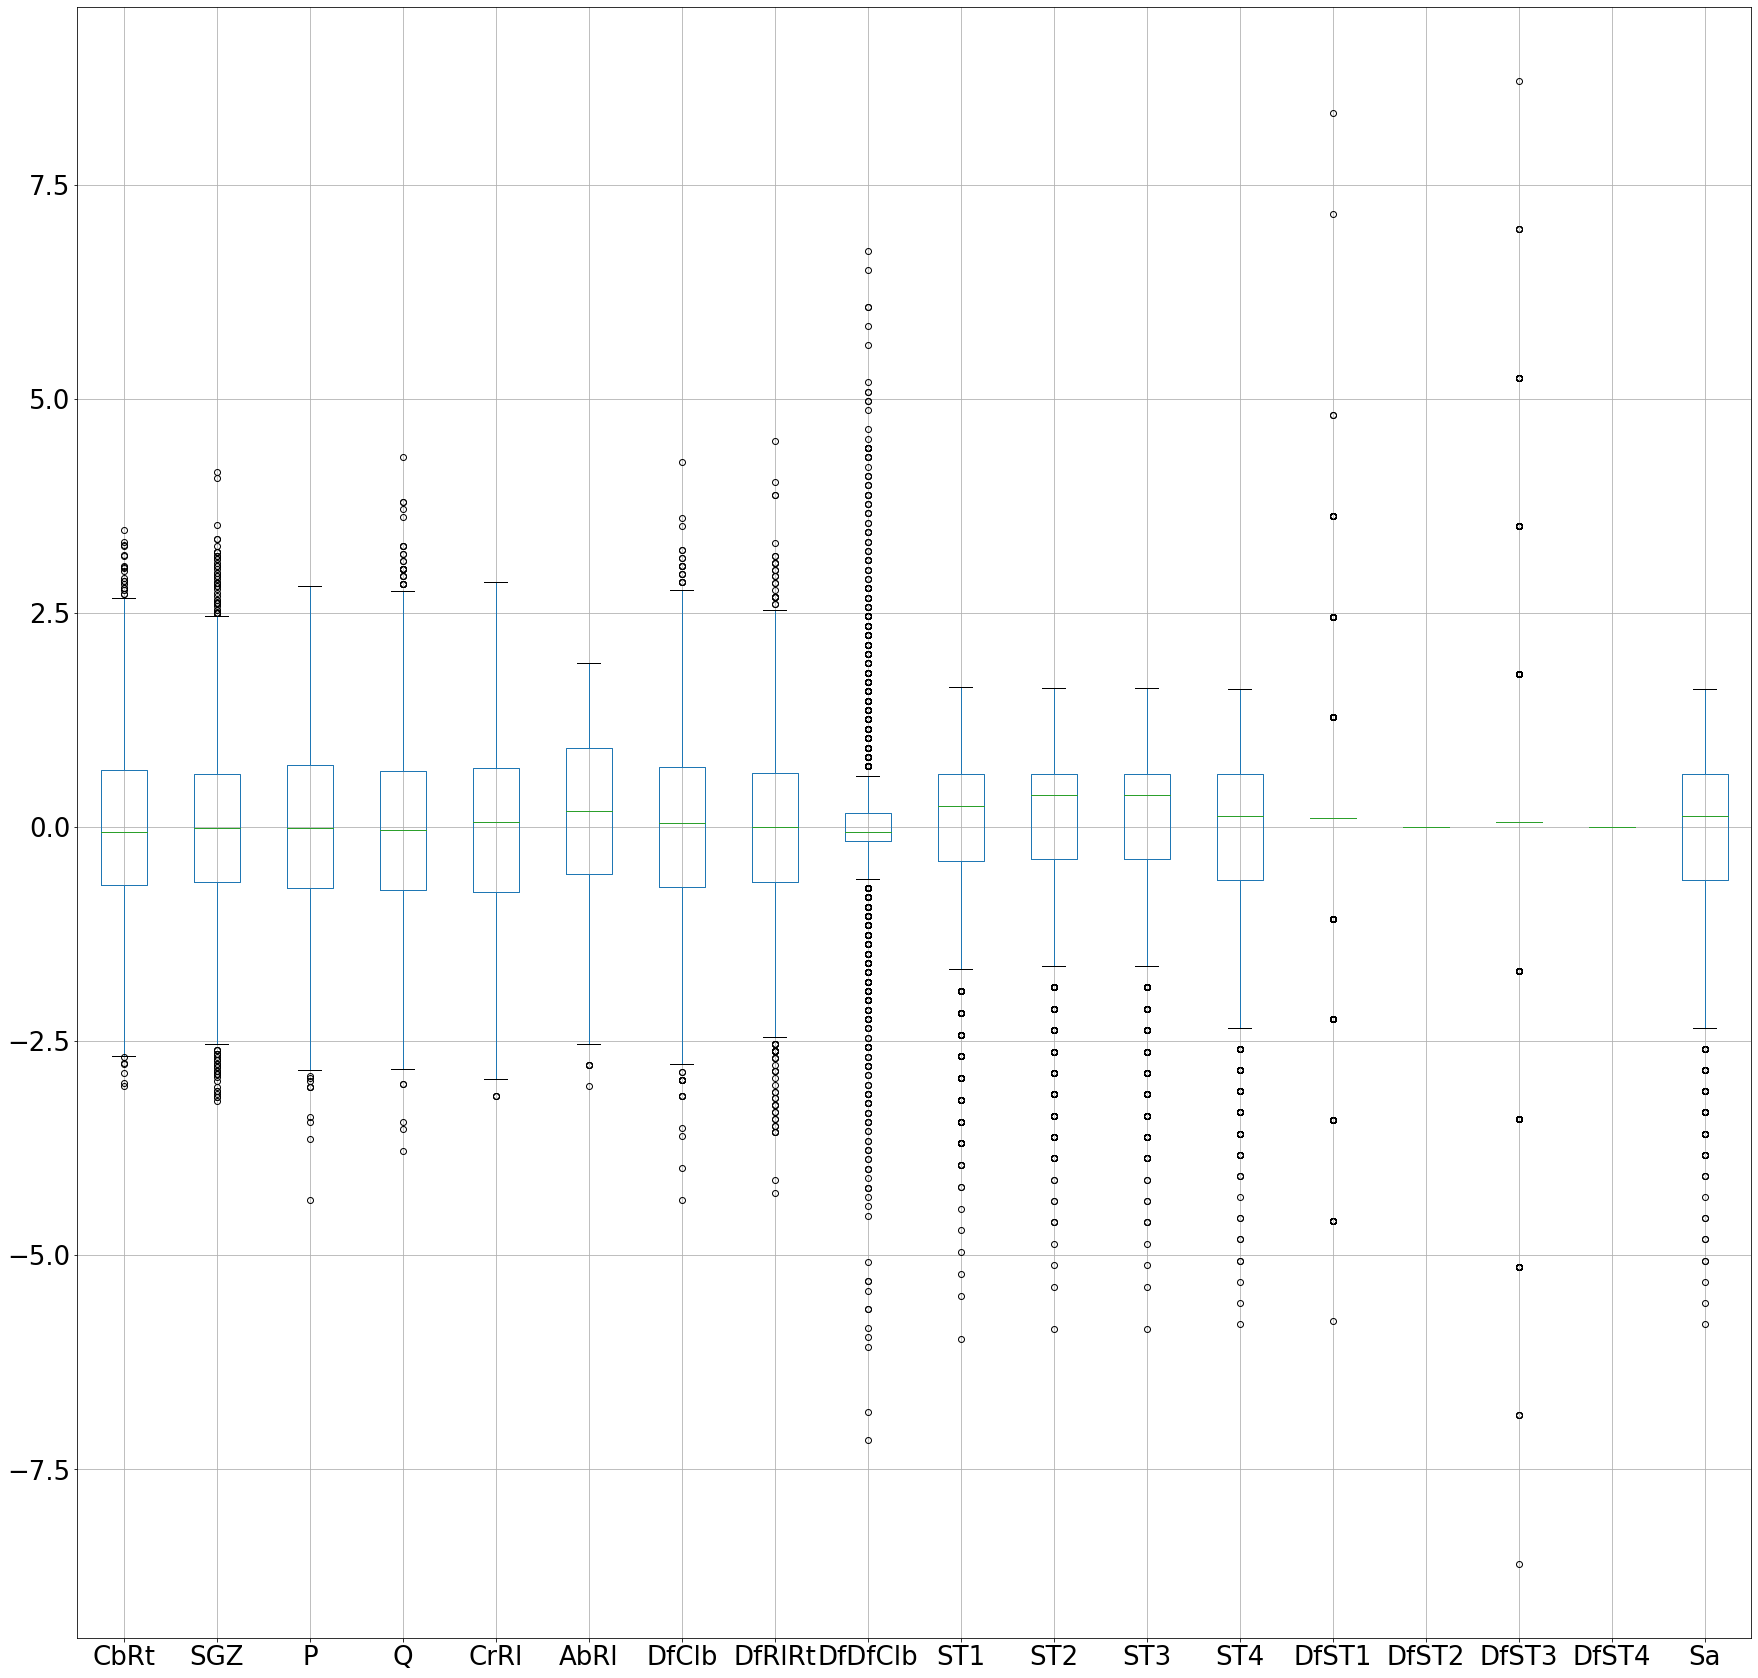

In [215]:
df_scaled.boxplot(figsize=(30,30), fontsize=26)

In [216]:
df_scaled.idxmax()

CbRt       2861
SGZ        1164
P          1166
Q          2486
CrRl       2387
AbRl         19
DfClb      3222
DfRlRt     3833
DfDfClb    1608
ST1        1759
ST2        1759
ST3        1759
ST4        1870
DfST1      3660
DfST2         0
DfST3      2168
DfST4         0
Sa         1870
dtype: int64

In [217]:
df_scaled

,CbRt,SGZ,P,Q,CrRl,AbRl,DfClb,DfRlRt,DfDfClb,ST1,ST2,ST3,ST4,DfST1,DfST2,DfST3,DfST4,Sa
0,-1.556246,0.888607,-1.038445,0.834413,-0.453480,-2.282414,0.422469,-1.269137,-0.383432,-1.409247,-2.122261,-2.122261,-2.096492,3.629565,0.0,0.054091,0.0,-2.096492
1,-0.990526,-0.839837,-1.231305,-0.473615,0.271384,0.187263,-0.421531,-1.506544,1.802921,-0.647938,-0.625691,-0.625691,-0.613344,0.103719,0.0,0.054091,0.0,-0.613344
2,-0.289763,-0.289878,-0.620582,-0.648019,0.167832,0.681199,0.328691,-0.240374,-0.164796,0.620911,0.372022,0.372022,0.375422,0.103719,0.0,0.054091,0.0,0.375422
3,-0.559849,0.495779,0.665149,0.224000,2.031767,-0.059704,-1.077975,-0.636052,0.600427,-0.394168,-0.126834,-0.126834,-0.118961,-2.246846,0.0,-1.676818,0.0,-0.118961
4,0.067918,-0.918403,1.372302,0.311202,1.824663,-2.035446,0.891357,-1.664815,-0.055479,-3.439406,-3.618831,-3.618831,-4.074024,1.279001,0.0,1.784999,0.0,-4.074024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.038814,1.085021,1.500875,2.229644,-2.835175,-1.047575,0.141135,2.371100,-7.161126,1.128451,1.120307,1.120307,1.116996,0.103719,0.0,0.054091,0.0,1.116996
3996,-0.943078,-0.604140,-0.395579,-0.996827,-0.349928,1.175134,0.985135,-0.794324,-1.148655,0.620911,0.621451,0.621451,0.375422,0.103719,0.0,0.054091,0.0,0.375422
3997,0.286907,2.184940,0.536576,-0.212010,1.617559,1.669070,-0.327753,-0.636052,0.272474,0.874681,0.870879,0.870879,0.869805,0.103719,0.0,0.054091,0.0,0.869805
3998,0.925623,1.045738,2.593747,2.055240,-1.385447,-1.294543,-2.297086,1.104931,-0.164796,-0.140398,0.372022,0.372022,0.375422,-2.246846,0.0,0.054091,0.0,0.375422


In [218]:
df_labels = df['Target'].copy()

In [219]:
from catboost import CatBoostRegressor

In [220]:
model = AutoML(time_budget=600, task='regression', metric='mse')

In [221]:
model.fit(df_scaled, df_labels)

[flaml.automl: 01-30 23:01:17] {2007} INFO - task = regression
[flaml.automl: 01-30 23:01:17] {2009} INFO - Data split method: uniform
[flaml.automl: 01-30 23:01:17] {2013} INFO - Evaluation method: cv
[flaml.automl: 01-30 23:01:17] {2113} INFO - Minimizing error metric: mse
[flaml.automl: 01-30 23:01:17] {2170} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 01-30 23:01:17] {2437} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-30 23:01:17] {2550} INFO - Estimated sufficient time budget=400s. Estimated necessary time budget=3s.
[flaml.automl: 01-30 23:01:17] {2597} INFO -  at 0.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 01-30 23:01:17] {2437} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-30 23:01:17] {2597} INFO -  at 0.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 01-30 23:01:17] {24

C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 01-30 23:01:19] {2597} INFO -  at 1.6s,	estimator xgboost's best error=0.0208,	best estimator lgbm's best error=0.0000
[flaml.automl: 01-30 23:01:19] {2437} INFO - iteration 20, current learner xgboost
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from p

[flaml.automl: 01-30 23:01:20] {2437} INFO - iteration 29, current learner xgboost
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.

[flaml.automl: 01-30 23:01:24] {2437} INFO - iteration 42, current learner extra_tree
[flaml.automl: 01-30 23:01:25] {2597} INFO -  at 7.1s,	estimator extra_tree's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:25] {2437} INFO - iteration 43, current learner lgbm
[flaml.automl: 01-30 23:01:25] {2597} INFO -  at 7.3s,	estimator lgbm's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:25] {2437} INFO - iteration 44, current learner xgboost
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the 

[flaml.automl: 01-30 23:01:31] {2437} INFO - iteration 57, current learner rf
[flaml.automl: 01-30 23:01:32] {2597} INFO -  at 14.2s,	estimator rf's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:32] {2437} INFO - iteration 58, current learner catboost
[flaml.automl: 01-30 23:01:34] {2597} INFO -  at 16.7s,	estimator catboost's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:34] {2437} INFO - iteration 59, current learner xgboost
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the approp

C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[flaml.automl: 01-30 23:01:35] {2597} INFO -  at 17.4s,	estimator xgb_limitdepth's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:35] {2437} INFO - iteration 65, current learner xgb_limitdepth
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

[flaml.automl: 01-30 23:01:35] {2437} INFO - iteration 70, current learner rf
[flaml.automl: 01-30 23:01:36] {2597} INFO -  at 18.2s,	estimator rf's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:36] {2437} INFO - iteration 71, current learner xgb_limitdepth
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\marci\anaconda3\envs\autoML\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pand

[flaml.automl: 01-30 23:01:36] {2437} INFO - iteration 76, current learner extra_tree
[flaml.automl: 01-30 23:01:36] {2597} INFO -  at 19.1s,	estimator extra_tree's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:36] {2437} INFO - iteration 77, current learner rf
[flaml.automl: 01-30 23:01:37] {2597} INFO -  at 19.3s,	estimator rf's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:37] {2437} INFO - iteration 78, current learner rf
[flaml.automl: 01-30 23:01:37] {2597} INFO -  at 19.5s,	estimator rf's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:37] {2437} INFO - iteration 79, current learner extra_tree
[flaml.automl: 01-30 23:01:37] {2597} INFO -  at 19.7s,	estimator extra_tree's best error=0.0000,	best estimator catboost's best error=0.0000
[flaml.automl: 01-30 23:01:37] {2437} INFO - iteration 80, current learner catboost
[flaml.automl: 01-30 23:01:46] {2597

SystemError: <method '_train' of '_catboost._CatBoost' objects> returned a result with an exception set

In [ ]:
df_pred=model.predict(df_scaled)
lin_mse = mean_squared_error(df_labels, df_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
df_test=pd.read_csv(r'C:\Users\marci\DataScience\Pitch_predictions\pitch-aileron\test.csv')

In [ ]:
df_test_no_Id = df_test.loc[:, df_test.columns!='Id'].copy()

df_test_no_Id

In [ ]:
df_test_scaled = pd.DataFrame(ss.fit_transform(df_test_no_Id),columns = df_test_no_Id.columns)

In [ ]:
y_hats = model.predict(df_test_scaled)

df_test['prediction'] = y_hats

df_out = pd.merge(df_test, df_test[['prediction']], how = 'left', left_index = True, right_index = True)

In [ ]:
result = df_out[['Id', 'prediction_x']].copy()

In [ ]:
result.rename({'prediction_x':'Target'}, inplace=True)

results = result.rename(columns={'prediction_x':'Target'})

results

In [ ]:
results.to_csv('Result_autoML1.csv', index = False)